# Diferencias Finitas

El método de diferencias finitas corresponde a una aproximación discreta del dominio del problema, generando un sistema de ecuaciones para tal efecto. Tanto Ecuaciones diferenciales ordinarias como parciales pueden ser resueltas numéricamente con este método.

Tomemos las fórmulas de diferencias finitas centradas para estimar la primera y segunda derivada de nuestra función a aproximar,

$$y'(t) = \frac{y(t+h)-y(t-h)}{2h} - \frac{h^2}{6}y'''(c)$$

$$y''(t) = \frac{y(t+h)-2y(t) + y(t-h)}{h^2} + \frac{h^2}{12}y''''(c)$$

y las reemplazaremos en nuestros problemas que involucran ecuaciones diferenciales. Si el problema original es lineal, el sistema de ecuaciones a resolver será lineal y podemos aproximarlo por eliminación gaussiana o por métodos iterativos. Problemas no lineales generaran sistemas de ecuaciones no lineales y habrá que resolverlos de otra forma.

## Problemas de Valor Inicial  (BVP) lineales

Por ejemplo el siguiente BVP puede ser resuelto utilizando diferencias finitas.

\begin{align*}
y'' = 4y\\
y(0) = 1\\
y(1) = 3
\end{align*}

Al reemplazar las derivadas por sus aproximaciones obtenemos que

\begin{align*}
\frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - 4w_i &= 0\\
\Rightarrow w_{i-1} + (-4h^2-2)w_i + w_{i+1} &= 0
\end{align*}

Si elegimos una aproximación de $n=3$ estimaciones el tamaño del intervalo es $h = \frac{1}{n+1} = \frac{1}{4}$ con tres ecuaciones. En general, como sabemos las condiciones de borde, nosotros buscamos una aproximación en $n$ puntos equiespaciados sin contar los extremos, luego para saber el tamaño del intervalo usamos la fórmula general $h = \frac{b-a}{n+1}$.

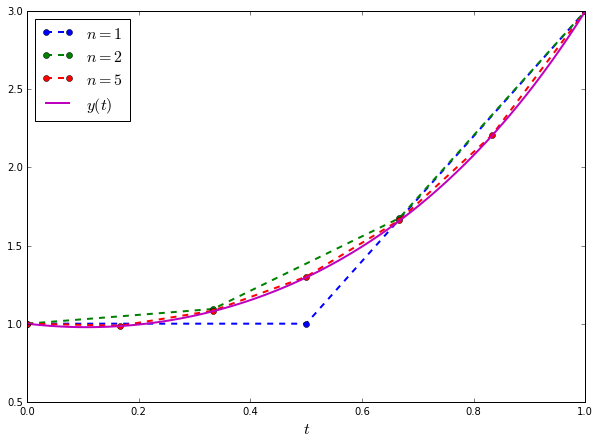

In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Rango de tiempo
tt = np.linspace(0, 1, 100)

# Solución Analítica
def y(t):
    return (np.exp(-2*t)*(-3*np.exp(2)+np.exp(4)-np.exp(4*t)+ 3*np.exp(2+4*t)))/(-1+np.exp(4))

yy = y(tt)


# Matriz de diferencias finitas que depende de n
def DiffMatrix(n, h):
    m = np.zeros((n,n), dtype=float)
    np.fill_diagonal(m, -4.0*h**2.0-2)
    dix, diy = np.diag_indices(n)
    dix = dix[:-1]
    diy = diy[:-1] + 1
    m[(dix, diy)] = 1
    dix = dix + 1
    diy = diy - 1
    m[(dix, diy)] = 1
    return m

plt.figure(figsize=(10,7))
# Para distintas precisiones
for n in [1, 2, 5]:
    # Calcular tamaño del intervalo
    h = 1.0/(n + 1.0)
    # Armar vector de coeficientes
    b = np.zeros((n))
    b[0] = -1
    b[-1] = -3
    # Resolver el sistema A*w = b
    # A es la matriz de diferencias finitas
    # w el vector de aproximaciones finitas
    A = DiffMatrix(n, h)
    w = np.concatenate(([1], np.linalg.solve(A, b), [3]))
    _t = np.linspace(0, 1, n+2)
    # Plot aproximación
    plt.plot(_t, w, 'o--',lw=2, label="$n ="+str(n)+"$")
                       
# Plots
plt.plot(t, yy, 'm', lw=2, label="$y(t)$")
plt.legend(loc='best', fontsize=16)
plt.xlabel("$t$", fontsize=16)
plt.show()

Los errores de éste método son dos principalmente:

1. Truncamiento de las fórmulas de diferencias finitas (es decir, cuando despreciamos los términos de orden superior que provienen de la Serie de Taylor que utilizamos para definir las fórmulas).
2. El error de solucionar numéricamente el sistema de ecuaciones lineales.

Las fórmulas centradas de diferencia finitas tienen un error proporcional a $h^2$. Nuestro método irá disminuyendo el error a medida que aumentamos la cantidad de subintervalos $n$, es decir, a medida que disminuimos $h$, y por lo tanto el error decrece como $\mathcal{O}(n^{-2})$.

Recordemos que para entender gráficamente cómo un error decrece (o crece) es conveniente establecer relaciones utilizando gráficos loglog, donde la pendiente del gráfico indica el exponente para la regla de cambio del error respecto a la variable independiente número de intervalos $n$.

Se puede observar que efectivamente la pendiente de este gráfico es -2, lo que confirma la regla del error que hemos calculado.

pendiente: -1.92040335823


/usr/lib64/python3.4/site-packages/scipy/interpolate/polyint.py:510: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
/usr/lib64/python3.4/site-packages/scipy/interpolate/polyint.py:510: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
/usr/lib64/python3.4/site-packages/scipy/interpolate/polyint.py:605: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
/usr/lib/python3.4/site-packages/IPython/kernel/__main__.py:18: RuntimeWarning: invalid value encountered in absolute


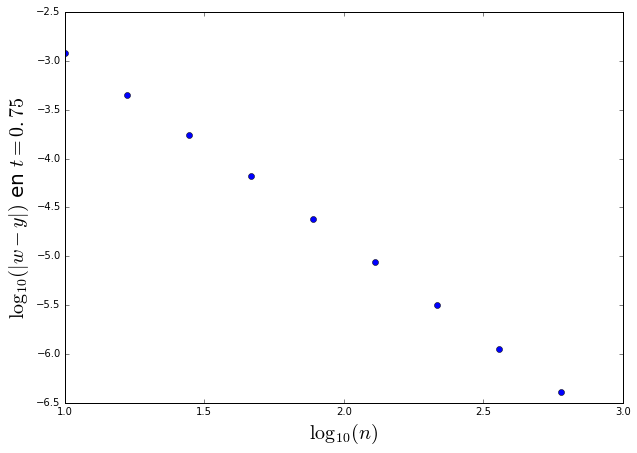

In [81]:
from scipy.interpolate import BarycentricInterpolator

y_data = y(0.75)
exp = np.linspace(1, 3, 10)
N = np.round(np.power(10, exp))
err = []

for n in N:
    n = int(n)
    h = 1.0/(n + 1.0)
    A = DiffMatrix(n, h)
    b = np.zeros((n))
    b[0] = -1
    b[-1] = -3
    w = np.concatenate(([1], np.linalg.solve(A, b), [3]))
    _t = np.linspace(0, 1, n+2)
    f = BarycentricInterpolator(_t, w)
    err.append(np.abs(f(0.75) - y(0.75)))

logerr = np.log10(err)
plt.figure(figsize=(10,7))
plt.plot(exp, logerr, 'bo')
slope = (logerr[1] - logerr[0]) / (exp[1] - exp[0])
print("pendiente:",slope)
plt.xlabel("$\log_{10}(n)$",fontsize=20)
plt.ylabel("$\log_{10}(|w-y|)$ en $t = 0.75$",fontsize=20)
plt.show()